<a href="https://colab.research.google.com/github/HappySUHEAN/Suhean-s-Pot/blob/main/(4)%EB%B0%B1%EC%88%98%ED%98%84_(%EB%8D%B0%EC%82%AC_%EC%99%84%EC%A3%BC%EB%B0%98)_%EC%B5%9C%EC%A2%85%ED%8F%89%EA%B0%80_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [최종평가주차 코딩 실습](딥러닝 01. 신경망 기초 이론_케라스를 사용한 신경망 구현_20200206_03) keras를 사용하여 fashion_mnist데이터를 분류하는 모델을 만드세요
* keras로 fashion_mnist를 학습시키세요
* 모델이 예측한 test set데이터 X_test[20]의 class를 출력하고, X_test0[20]이미지를 출력하여 정확히 예측했는지 판단하세요
```
class 구분
0 : 티셔츠/탑
1 : 바지
2 : 풀오버(스웨터의 일종)
3 : 드레스
4 : 코트
5 : 샌들
6 : 셔츠
7 : 스니커즈
8 : 가방
9 : 앵클 부츠
```


In [1]:
# 이 코드를 먼저 실행하세요

from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

import matplotlib.pylab as plt

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# 여기에 코드를 작성하세요

print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[:5]

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8
(60000, 784) float32


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

tf.random.set_seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(learning_rate=0.2), loss='mean_squared_error', metrics=["accuracy"])

%time
hist = model.fit(X_train, Y_train,
                 epochs=50, batch_size=100,
                 validation_data=(X_test, Y_test),
                 verbose=2)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Epoch 1/50
600/600 - 1s - loss: 0.0972 - accuracy: 0.2524 - val_loss: 0.0863 - val_accuracy: 0.3369
Epoch 2/50
600/600 - 1s - loss: 0.0836 - accuracy: 0.4127 - val_loss: 0.0809 - val_accuracy: 0.4887
Epoch 3/50
600/600 - 1s - loss: 0.0783 - accuracy: 0.5104 - val_loss: 0.0758 - val_accuracy: 0.5286
Epoch 4/50
600/600 - 1s - loss: 0.0734 - accuracy: 0.5469 - val_loss: 0.0711 - val_accuracy: 0.5846
Epoch 5/50
600/600 - 1s - loss: 0.0689 - accuracy: 0.5981 - val_loss: 0.0669 - val_accuracy: 0.6103
Epoch 6/50
600/600 - 1s - loss: 0.0648 - accuracy: 0.6225 - val_loss: 0.0631 - val_accuracy: 0.6233
Epoch 7/50
600/600 - 1s - loss: 0.0611 - accuracy: 0.6388 - val_loss: 0.0597 - val_accuracy: 0.6421
Epoch 8/50
600/600 - 1s - loss: 0.0579 - accuracy: 0.6561 - val_loss: 0.0567 - val_accuracy: 0.6619
Epoch 9/50
600/600 - 1s - loss: 0.0551 - accuracy: 0.6720 - val_loss: 0.0541 - val_accuracy: 0.6733
Epoch 10/50
600/600 - 1s - loss: 0.0

In [49]:
import numpy as np

model.predict(X_test[[20],:])

array([[0.1868656 , 0.00601655, 0.21198761, 0.0073314 , 0.02309734,
        0.00617048, 0.15986007, 0.00570244, 0.01578408, 0.00352684]],
      dtype=float32)

In [50]:
# 결과 출력 코드
# model.predict_classes(X_test[[20],:],verbose=0)



np.argmax(model.predict(X_test[[20], :],verbose=0), axis=-1)



array([2])

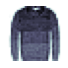

In [51]:
plt.figure(figsize=(1,1))
plt.imshow(X_test0[20],cmap=plt.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()